<a href="https://colab.research.google.com/github/salim4n/kaggle_competition/blob/main/Titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Résultat de  0.76555 sur kaggle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Permet d'afficher les graphiques directement dans la sortie Colab
%matplotlib inline


In [ ]:
# Chemin vers les fichiers CSV
train_csv_path = "data/train.csv"
test_csv_path = "data/test.csv"

In [ ]:
# Charger les données
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

In [ ]:
# Afficher les premières lignes du jeu de données d'entraînement
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
# Informations sur les colonnes et les valeurs manquantes
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# Statistiques descriptives
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
# Vérifier les valeurs manquantes
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


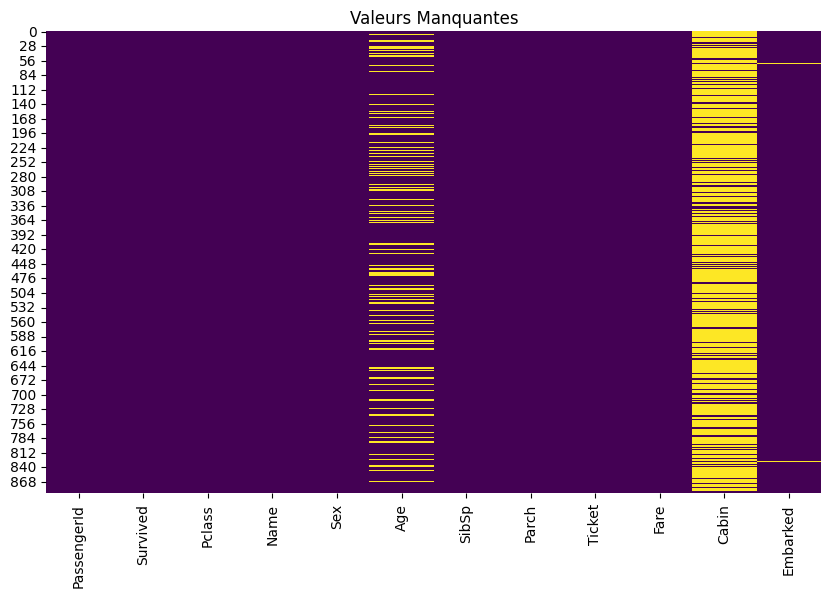

In [ ]:
# Visualiser les valeurs manquantes avec une heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cmap='viridis', cbar=False)
plt.title("Valeurs Manquantes")
plt.show()

<ipython-input-9-260d5515dec7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')


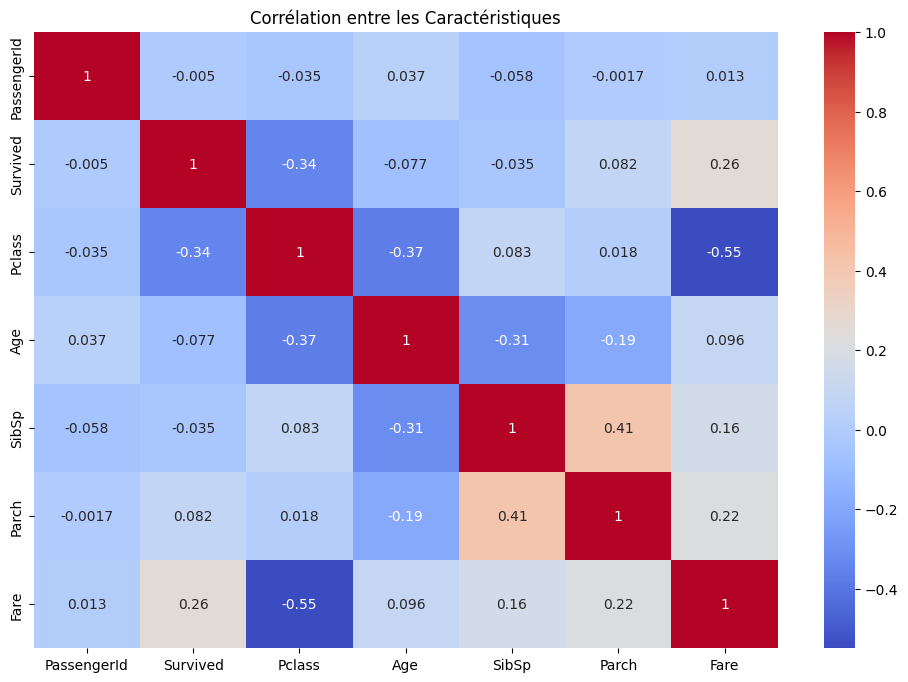

In [ ]:
# Visualisation des relations entre les caractéristiques et la variable cible
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre les Caractéristiques")
plt.show()

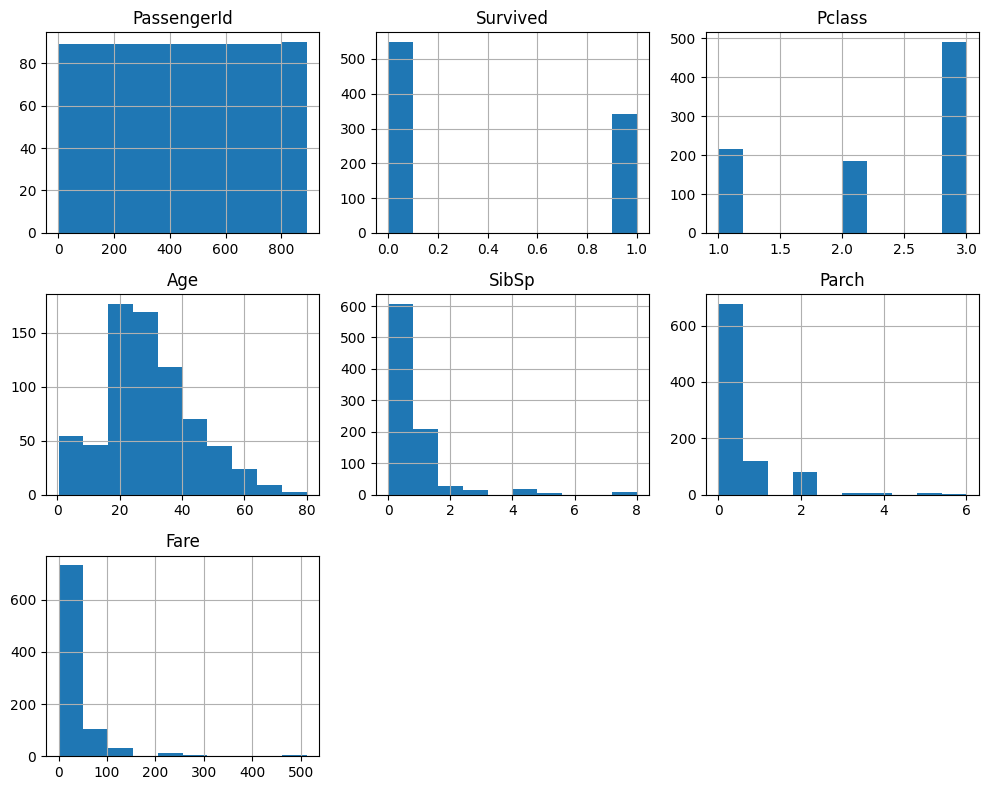

In [ ]:
# Visualisation des distributions des caractéristiques
train_data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [ ]:
# Remplissage des valeurs manquantes dans la colonne "Age" avec la médiane
median_age = train_data['Age'].median()
median_age_test = test_data['Age'].median()
train_data['Age'].fillna(median_age, inplace=True)
test_data['Age'].fillna(median_age_test, inplace=True)

# Suppression de la colonne "Cabin"
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

# Afficher à nouveau les informations sur les valeurs manquantes
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [ ]:
print(test_data.isnull().sum())

Pclass    0
Sex       0
Age       0
dtype: int64


In [ ]:
# Suppression de plusieurs colonnes
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Embarked','Parch','SibSp','Fare']
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [ ]:
test_data.head()

,Pclass,Sex,Age
0,3,male,34.5
1,3,female,47.0
2,2,male,62.0
3,3,male,27.0
4,3,female,22.0


In [ ]:
train_data.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582
std,0.486592,0.836071,13.019697
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,22.000000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,35.000000
max,1.000000,3.000000,80.000000


import numpy as np
from google.colab import autoviz
df_2908878289952775203 = autoviz.get_df('df_2908878289952775203')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2908878289952775203, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3155923125202782535 = autoviz.get_df('df_3155923125202782535')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3155923125202782535, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1234423358161153183 = autoviz.get_df('df_1234423358161153183')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1234423358161153183, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_951775417380936621 = autoviz.get_df('df_951775417380936621')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_951775417380936621, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1488459608111040644 = autoviz.get_df('df_1488459608111040644')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1488459608111040644, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2583252124578300273 = autoviz.get_df('df_2583252124578300273')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2583252124578300273, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4894869781557133012 = autoviz.get_df('df_4894869781557133012')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_4894869781557133012, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7764760950539129768 = autoviz.get_df('df_7764760950539129768')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_7764760950539129768, *[[['Survived', 'Pclass'], ['Pclass', 'Age']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_6685633550693291978 = autoviz.get_df('df_6685633550693291978')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6685633550693291978, *['Survived', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_4712698635457489168 = autoviz.get_df('df_4712698635457489168')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_4712698635457489168, *['Pclass', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2914465559398532079 = autoviz.get_df('df_2914465559398532079')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2914465559398532079, *['Age', 'index'], **{'inner': 'stick'})
chart

In [ ]:
test_data.describe()

,Pclass,Age
count,418.000000,418.000000
mean,2.265550,29.599282
std,0.841838,12.703770
min,1.000000,0.170000
25%,1.000000,23.000000
50%,3.000000,27.000000
75%,3.000000,35.750000
max,3.000000,76.000000


In [ ]:
# Diviser les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(train_data.drop('Survived', axis=1), train_data['Survived'], test_size=0.2, random_state=42)

# Convertir la colonne "Sex" en valeurs numériques, petit oubli ...
sex_mapping = {'male': 0, 'female': 1}
X_train['Sex'] = X_train['Sex'].map(sex_mapping)
X_val['Sex'] = X_val['Sex'].map(sex_mapping)
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Construction du modèle
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val))

Epoch 1/10
23/23 [==============================] - 1s 11ms/step - loss: 0.7365 - accuracy: 0.6966 - val_loss: 0.4604 - val_accuracy: 0.7654
Epoch 2/10
23/23 [==============================] - 0s 4ms/step - loss: 0.5482 - accuracy: 0.8020 - val_loss: 0.4983 - val_accuracy: 0.7933
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 0.5184 - accuracy: 0.7865 - val_loss: 0.5769 - val_accuracy: 0.7709
Epoch 4/10
23/23 [==============================] - 0s 4ms/step - loss: 0.5241 - accuracy: 0.8006 - val_loss: 0.5907 - val_accuracy: 0.7709
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4821 - accuracy: 0.7865 - val_loss: 0.5353 - val_accuracy: 0.7654
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4755 - accuracy: 0.8118 - val_loss: 0.5138 - val_accuracy: 0.7989
Epoch 7/10
23/23 [==============================] - 0s 4ms/step - loss: 0.5199 - accuracy: 0.8160 - val_loss: 0.7130 - val_accuracy: 0.7821
Epoch 8/10
23/23 [=

In [ ]:
# Construction du modèle
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dense(1, activation='linear')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train_scaled, y_train, epochs=120, batch_size=32, validation_data=(X_val_scaled, y_val))

Epoch 1/120
23/23 [==============================] - 3s 15ms/step - loss: 0.9102 - accuracy: 0.7346 - val_loss: 0.7016 - val_accuracy: 0.7821
Epoch 2/120
23/23 [==============================] - 0s 5ms/step - loss: 0.7460 - accuracy: 0.7879 - val_loss: 0.9856 - val_accuracy: 0.7654
Epoch 3/120
23/23 [==============================] - 0s 5ms/step - loss: 0.7443 - accuracy: 0.7935 - val_loss: 0.7303 - val_accuracy: 0.7821
Epoch 4/120
23/23 [==============================] - 0s 6ms/step - loss: 0.7173 - accuracy: 0.7837 - val_loss: 0.9174 - val_accuracy: 0.7598
Epoch 5/120
23/23 [==============================] - 0s 4ms/step - loss: 0.7021 - accuracy: 0.8076 - val_loss: 0.8353 - val_accuracy: 0.7821
Epoch 6/120
23/23 [==============================] - 0s 5ms/step - loss: 0.6926 - accuracy: 0.8090 - val_loss: 0.7004 - val_accuracy: 0.7765
Epoch 7/120
23/23 [==============================] - 0s 4ms/step - loss: 0.6841 - accuracy: 0.8062 - val_loss: 0.8900 - val_accuracy: 0.8045
Epoch 8/120


In [ ]:
test_data['Sex'] = test_data['Sex'].map(sex_mapping)
# Faire des prédictions sur le jeu de test
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)

# Générer une séquence numérique unique pour les passagers
passenger_ids = range(892, 892 + len(test_data))

# Créer un DataFrame pour les résultats
results = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': y_pred.flatten()
})

# Enregistrer les résultats au format CSV
results.to_csv('submission.csv', index=False)




results.head()


14/14 [==============================] - 0s 2ms/step


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
